In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cleaning & Integrating Labour Cost Data

In [12]:
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
sector_names = lc_across_industry[sector].unique()
lc_across_industry.head(10)


,quarter,level_1,level_2,level_3,value
0,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Manufacturing,88.4
1,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Construction,55.0
2,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Utilities,71.9
3,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Other Goods Industries,33.8
4,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Wholesale & Retail Trade,73.9
5,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Transportation & Storage,62.4
6,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,19.3
7,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,98.8
8,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Finance & Insurance,44.3
9,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Business Services,27.7


In [13]:
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
sector_names = combined_lc[sector].unique()
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1980-Q1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9
1,1980-Q2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8
2,1980-Q3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8
3,1980-Q4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0
4,1981-Q1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2018-Q4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
156,2019-Q1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1
157,2019-Q2,101.3,104.4,106.7,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6
158,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.1,NaN,NaN,NaN


<AxesSubplot:xlabel='quarter'>

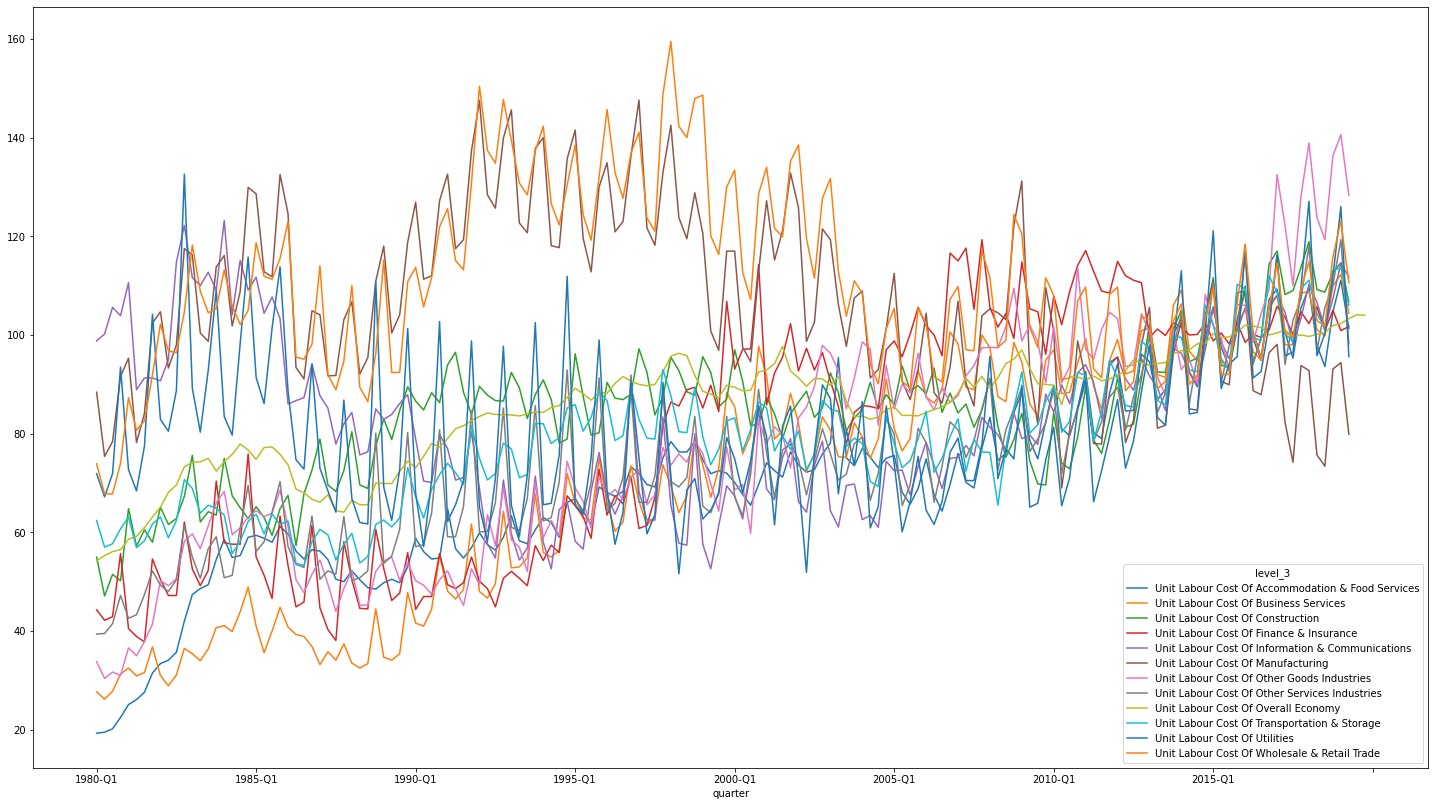

In [14]:
combined_lc.pivot(index="quarter", columns=sector, values="value").plot(figsize=(25,14))

In [6]:
## Cleaning Fertility Rates

In [15]:
df = pd.read_csv("./births-and-fertility-annual-1960-2018/total-fertility-rate-and-reproduction-rate.csv")
df.head(10)
## validation data set

,year,level_1,value
0,1960,Total Fertility Rate,5.76
1,1960,Gross Reproduction Rate,2.78
2,1960,Net Reproduction Rate,2.54
3,1961,Total Fertility Rate,5.41
4,1961,Gross Reproduction Rate,2.63
5,1961,Net Reproduction Rate,2.41
6,1962,Total Fertility Rate,5.21
7,1962,Gross Reproduction Rate,2.53
8,1962,Net Reproduction Rate,2.31
9,1963,Total Fertility Rate,5.16


In [16]:
ts = pd.read_csv('birth-death/live-birth.csv', thousands=",").T
ts.head(10)
#ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.iloc[0][0] = "Total Live-Births"
#pd.PeriodIndex(ts["Data Series"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2'), freq='Q').to_timestamp()
#df.index.names = ['quarter']
#ts.reset_index(level=0, inplace=True)
ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.index.names = ['quarter']
ts.reset_index(level=0, inplace=True)
ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')

/tmp/ipykernel_36614/3206424000.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [17]:
test =pd.merge(ts, df_lc, on='quarter', how='inner')
test['time'] = pd.PeriodIndex(test['quarter'], freq='Q').to_timestamp() # convert quarterly data into time
test = test.dropna()
raw = test.reset_index(drop=True)
#raw = raw.reindex(index=raw.index[::-1])
raw

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,2019-Q2,9487,4384,3387,1175,336,124,81,101.3,104.4,...,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6,2019-04-01
1,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019-01-01
2,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018-10-01
3,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018-07-01
4,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01
130,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
131,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
132,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01


In [18]:
#raw.sort_values(by="time")
#raw.to_csv("./birth_labour", sep='\t', encoding='utf-8')
raw = raw[::-1].reset_index(drop = True)
raw

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,1986-Q1,9954,4414,3553,1433,316,103,61,59.7,40.8,...,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0,1986-01-01
1,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01
2,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
3,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
4,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018-04-01
130,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018-07-01
131,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018-10-01
132,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019-01-01


In [11]:
#raw = pd.read_csv("./birth_labour", sep='\t', encoding='utf-8')
#raw['time'] = pd.PeriodIndex(raw['quarter'], freq='Q').to_timestamp()
#ts.tail(10)

In [16]:
raw.head()

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time,total,sd,mean,bolu,bold
0,1986-Q1,9954,4414,3553,1433,316,103,61,59.7,40.8,...,73.7,62.3,88.6,123.0,1986-01-01,9954,NaN,NaN,NaN,NaN
1,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,68.8,53.7,74.7,95.5,1986-04-01,9353,NaN,NaN,NaN,NaN
2,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,68.0,53.3,72.8,95.1,1986-07-01,9854,NaN,NaN,NaN,NaN
3,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,66.7,58.1,94.1,98.1,1986-10-01,10239,NaN,NaN,NaN,NaN
4,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,66.1,60.6,73.0,114.0,1987-01-01,8834,NaN,NaN,NaN,NaN


## Bollinger Bands
Standard deviation over past 4 years(16 time steps)

In [19]:
raw.groupby([pd.Grouper(key="time", freq="Y")])["Total Live-Births"].sum()
raw["total"] = raw["Total Live-Births"]
raw["sd"] = raw["total"].rolling(16).std(ddof=0)
raw["mean"] = raw["total"].rolling(16).mean()
raw['bolu'] = raw['mean'] + 2*raw['sd']
raw['bold'] = raw['mean'] - 2*raw['sd']
raw.tail(5)

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time,total,sd,mean,bolu,bold
129,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,100.1,104.4,95.8,102.9,2018-04-01,9427,526.134307,10246.0625,11298.331113,9193.793887
130,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.5,101.2,100.3,101.8,2018-07-01,9841,522.642146,10194.2500,11239.534291,9148.965709
131,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,101.9,113.1,111.8,115.8,2018-10-01,10173,455.017015,10130.6250,11040.659031,9220.590969
132,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,102.3,113.6,126.0,123.1,2019-01-01,9402,487.690540,10082.7500,11058.131079,9107.368921
133,2019-Q2,9487,4384,3387,1175,336,124,81,101.3,104.4,...,103.3,106.0,95.6,110.6,2019-04-01,9487,508.533538,10045.1250,11062.192076,9028.057924


In [20]:
from datetime import datetime
#test.set_index('time') set index as time
target = list(raw)[1]
cols = list(raw)[8:20]
timelist = list(raw['time'])
#timelist = [datetime.strptime(date, '%Y-%m-%d').date() for date in timelist]
print('Training set shape:{}'.format(test.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))
list(raw)[1]

Training set shape:(134, 21)
Length of Time Series: 134
Feature targetted: Total Live-Births
Featured selected: ['Unit Labour Cost Of Accommodation & Food Services', 'Unit Labour Cost Of Business Services', 'Unit Labour Cost Of Construction', 'Unit Labour Cost Of Finance & Insurance', 'Unit Labour Cost Of Information & Communications', 'Unit Labour Cost Of Manufacturing', 'Unit Labour Cost Of Other Goods Industries', 'Unit Labour Cost Of Other Services Industries', 'Unit Labour Cost Of Overall Economy', 'Unit Labour Cost Of Transportation & Storage', 'Unit Labour Cost Of Utilities', 'Unit Labour Cost Of Wholesale & Retail Trade']


'Total Live-Births'

In [21]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.nn.utils import weight_norm
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(131254)

train_length = int(0.8*len(raw))
depth = 4
batch_size = 32
prediction_horizon = 1

train = raw.iloc[:train_length, :]
valid = raw.iloc[train_length:, :]

    #X = np.zeros((len(raw), depth, len(cols)))
    #for i, name in enumerate(cols):
    #    for j in range(depth):
    #        X[:, j, i] = raw[name].shift(depth - j - 1).bfill()
    #y = raw[target].shift(-1).ffill().values
X = np.zeros((len(train), depth, len(cols)))
for i, name in enumerate(cols):
    for j in range(depth):
        X[:, j, i] = train[name].shift(depth - j - 1).bfill()
Y = train[target].shift(-1).ffill().values

x = np.zeros((len(valid), depth, len(cols)))
for i, name in enumerate(cols):
    for j in range(depth):
        x[:, j, i] = valid[name].shift(depth - j - 1).bfill()
y = valid[target].shift(-1).ffill().values

In [22]:
from datetime import datetime
#test.set_index('time') set index as time
target = list(raw)[1]
cols = list(raw)[8:20]
timelist = list(raw['time'])
#timelist = [datetime.strptime(date, '%Y-%m-%d').date() for date in timelist]
print('Training set shape:{}'.format(test.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(134, 21)
Length of Time Series: 134
Feature targetted: Total Live-Births
Featured selected: ['Unit Labour Cost Of Accommodation & Food Services', 'Unit Labour Cost Of Business Services', 'Unit Labour Cost Of Construction', 'Unit Labour Cost Of Finance & Insurance', 'Unit Labour Cost Of Information & Communications', 'Unit Labour Cost Of Manufacturing', 'Unit Labour Cost Of Other Goods Industries', 'Unit Labour Cost Of Other Services Industries', 'Unit Labour Cost Of Overall Economy', 'Unit Labour Cost Of Transportation & Storage', 'Unit Labour Cost Of Utilities', 'Unit Labour Cost Of Wholesale & Retail Trade']


In [23]:
def relative(data):
    return torch.Tensor((data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0)+ 1e-9)), data.max(axis=0), data.min(axis=0)

X_train, X_train_max , X_train_min = relative(X)
X_test, X_test_max , X_test_min = relative(x)

y_train, y_train_max , y_train_min = relative(Y)
y_test, y_test_max , y_test_min = relative(y)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)


In [22]:
import torch
import torch.nn as nn
from torch.nn.utils import weight_norm
torch.manual_seed(8)
class TCNTemporalBlock(nn.Module):
    def __init__(self, input_channels, output_channels, kernel_size, dilation):
        super().__init__()
        padding = int(dilation*(kernel_size-1))
        self.pad = nn.ConstantPad1d((padding, 0), 0)
        self.conv1 = weight_norm(nn.Conv1d(input_channels, output_channels, kernel_size, dilation=dilation))
        self.conv2 = weight_norm(nn.Conv1d(output_channels, output_channels, kernel_size, dilation=dilation))
        self.residual = nn.Conv1d(input_channels, output_channels, 1)
        
    def forward(self, x):
        out = self.pad(x)
        out = torch.relu(self.conv1(out))
        out = self.pad(out)
        out = torch.relu(self.conv2(out))
        y = self.residual(x)
        out = torch.relu(out + y)
        return out
    

class TCN(nn.Module):
    def __init__(self, input_dim, n_layers, n_channels=32, kernel_size=3):
        super().__init__()
        self.first_layer = TCNTemporalBlock(input_dim, n_channels, kernel_size, 1)
        self.tcn_layers = nn.ModuleList([TCNTemporalBlock(n_channels, n_channels, kernel_size, 2**(i+1)) for i in range(n_layers-1)])
        self.n_layers = n_layers
        self.output_transform = nn.Linear(n_channels, 1)
    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.first_layer(x)
        for i in range(self.n_layers-1):
            x = self.tcn_layers[i](x)
        x = x[..., -1]
        out = self.output_transform(x)
        return out.squeeze(1)

mse:  4426798.0 mae:  1614.3733


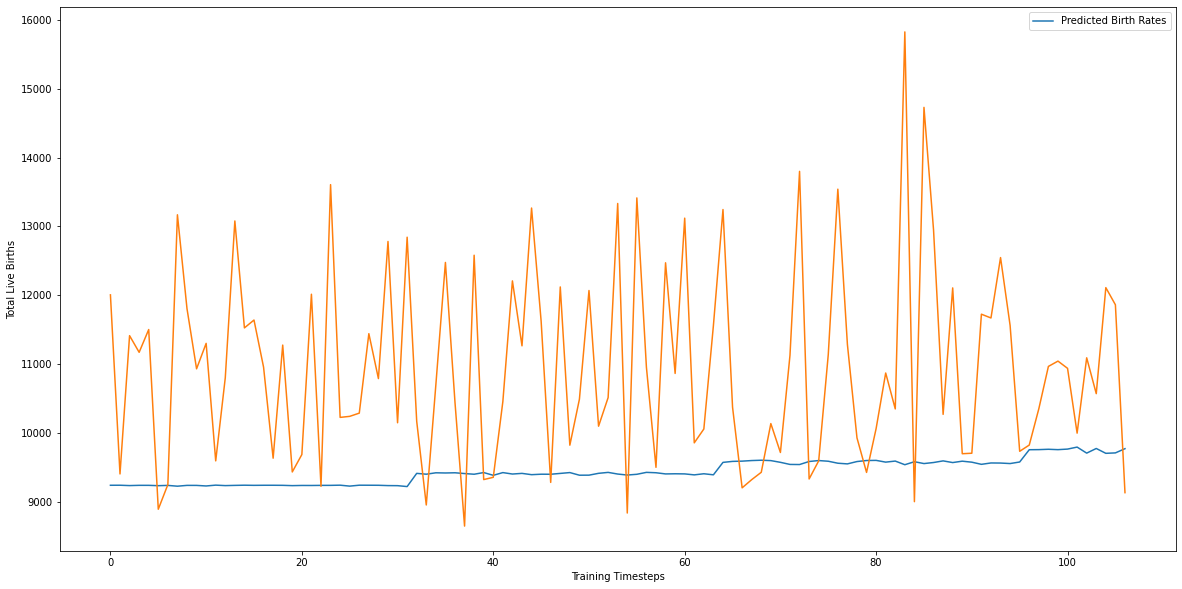

Iter:  0 train_loss:  0.30802755802869797 val_loss:  0.12205701321363449
Iter:  1 train_loss:  0.21435478702187538 val_loss:  0.08837500959634781
Iter:  2 train_loss:  0.17791100591421127 val_loss:  0.07991418987512589
Iter:  3 train_loss:  0.1658085323870182 val_loss:  0.08130896836519241
Iter:  4 train_loss:  0.1431404259055853 val_loss:  0.07902203500270844
Iter:  5 train_loss:  0.1328491810709238 val_loss:  0.07127725332975388
Iter:  6 train_loss:  0.13100987300276756 val_loss:  0.06373805552721024
Iter:  7 train_loss:  0.09194737672805786 val_loss:  0.056761734187603
Iter:  8 train_loss:  0.08517408184707165 val_loss:  0.05539540573954582
Iter:  9 train_loss:  0.06534569151699543 val_loss:  0.06116723269224167
mse:  758336.25 mae:  640.20654


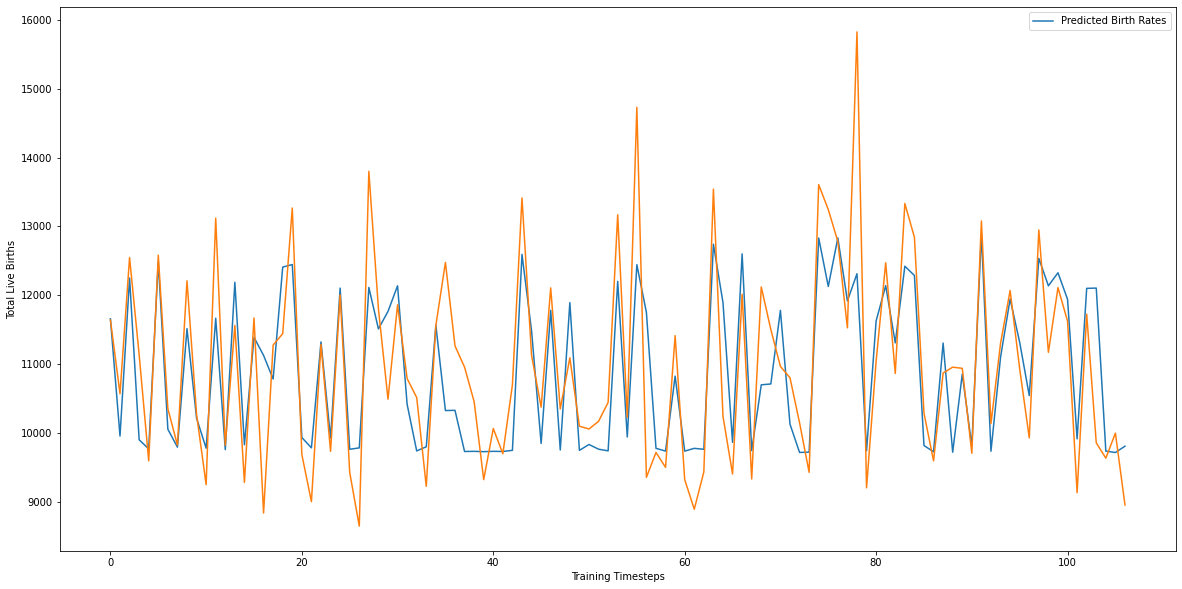

Iter:  10 train_loss:  0.05869952496141195 val_loss:  0.04626702517271042
Iter:  11 train_loss:  0.04937032796442509 val_loss:  0.059141505509614944
Iter:  12 train_loss:  0.06771891564130783 val_loss:  0.0587117075920105
Iter:  13 train_loss:  0.04572759196162224 val_loss:  0.05413631349802017
Iter:  14 train_loss:  0.04208998568356037 val_loss:  0.0636366531252861
Iter:  15 train_loss:  0.03799759875983 val_loss:  0.04874008893966675
Iter:  16 train_loss:  0.033093055011704564 val_loss:  0.058540228754282
Iter:  17 train_loss:  0.03696114290505648 val_loss:  0.04770898073911667
Iter:  18 train_loss:  0.03067146148532629 val_loss:  0.054870396852493286
Iter:  19 train_loss:  0.028016813565045595 val_loss:  0.055938124656677246


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = TCN(X_train.shape[2], 5).cuda()
opt = torch.optim.Adam(model.parameters(), lr=0.002)
sc = torch.optim.lr_scheduler.StepLR(opt, 10, 0.9)
loss = nn.MSELoss()
early_stopping_rounds=10
vl = 99999
counter = 0
for e in range(300):
    train_loss = 0
    val_loss = 0
    preds = []
    true = []
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        
        opt.zero_grad()
        
        output = model(batch_x)
        true.append(batch_y.detach().cpu().numpy())
        preds.append(output.detach().cpu().numpy())
        
        l = loss(output, batch_y)
        
        l.backward()
        
        opt.step()
        
        train_loss += l.item()
    true = np.concatenate(true)
    preds = np.concatenate(preds)
    
    sc.step()
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            
            output = model(batch_x)
            l = loss(output, batch_y)
            val_loss += l.item()

            
    if vl > val_loss:
        vl = val_loss
        torch.save(model.state_dict(), 'birth_labour.pt')
        counter = 0
    
    else:
        counter += 1
        
    if counter >= early_stopping_rounds:
        break
    
    if (e%10 == 0):
        preds = preds*(y_train_max - y_train_min) + y_train_min
        true = true*(y_train_max - y_train_min) + y_train_min
        mse = mean_squared_error(true, preds)
        mae = mean_absolute_error(true, preds)
        print("mse: ", mse, "mae: ", mae)
        plt.figure(figsize=(20, 10))
        plt.plot(preds, label='Predicted Birth Rates')
        plt.plot(true)
        plt.xlabel("Training Timesteps")
        plt.ylabel("Total Live Births")
        plt.legend(loc="upper right")
        plt.show()
        
    print('Iter: ', e, 'train_loss: ', train_loss, 'val_loss: ', val_loss)



In [27]:
preds = []
true = []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()

        output = model(batch_x)
        
        true.append(batch_y.detach().cpu().numpy())
        preds.append(output.detach().cpu().numpy())

true = np.concatenate(true)
preds = np.concatenate(preds)

0.06702687 0.21374452


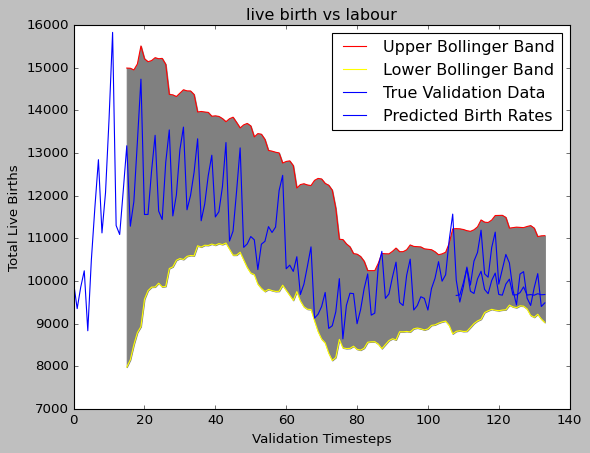

<Figure size 12000x12000 with 0 Axes>

In [28]:
preds_rel = preds
true_rel = true
raw.loc[len(raw)-len(preds)+1:len(raw), 'pred'] = (preds*(y_test_max-y_test_min+ 1e-9) + y_test_min)[:-1]
raw.loc[len(raw)-len(preds)+1:len(raw), 'test'] = (true*(y_test_max-y_test_min+ 1e-9) + y_test_min)[:-1]
plt.style.use('classic')
plt.plot(raw['bolu'],color="red", label='Upper Bollinger Band')
plt.plot(raw['bold'],color="yellow", label='Lower Bollinger Band')
plt.plot(raw['total'], label='True Validation Data')
plt.plot(raw['pred'],color="blue", label='Predicted Birth Rates')
plt.title("live birth vs labour")
plt.xlabel("Validation Timesteps")
plt.ylabel("Total Live Births")
plt.legend(loc="upper right")
plt.fill_between(raw.index,raw['bolu'],raw['bold'], color='gray')
plt.figure(figsize=(10, 10), dpi=1200)
fig1 = plt.gcf()
fig1.savefig('plot_outputs/birthvs' + sector +'.png')

mse = mean_squared_error(true, preds)
mae = mean_absolute_error(true, preds)
#classification_report(true,preds)
print(mse, mae)
# convert to binary classification
# statistical significance => problem space
# lagging data=> m

In [80]:
# VARMA example
## endogenous
from statsmodels.tsa.statespace.varmax import VARMAX
# dataset with variates
data = train[[target]+cols].values.tolist()
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps=27)
yhat
## RUN JUST ENDOGENOUS EXOGENOUS is a dumpsterfire

/home/ksatrayamaii/.virtualenvs/cds/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


KeyboardInterrupt: 

<Figure size 12000x12000 with 0 Axes>

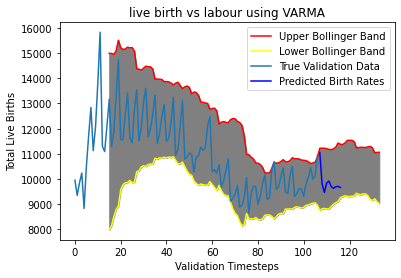

<Figure size 12000x12000 with 0 Axes>

In [74]:
varma = pd.DataFrame(yhat)
plt.plot(raw['bolu'],color="red", label='Upper Bollinger Band')
plt.plot(raw['bold'],color="yellow", label='Lower Bollinger Band')
plt.plot(train['total'], label='True Validation Data')
plt.plot(range(107,117),varma[0],color="blue", label='Predicted Birth Rates')
plt.title("live birth vs labour using VARMA")
plt.xlabel("Validation Timesteps")
plt.ylabel("Total Live Births")
plt.legend(loc="upper right")
plt.fill_between(raw.index,raw['bolu'],raw['bold'], color='gray')
plt.figure(figsize=(10, 10), dpi=1200)


In [ ]:
import numpy as np
from scipy.stats import norm

#The inputs are two error lists (or array). The outputs are the confidence that these two models have obvious performance discrepancy
#The lengths of the inputs should match. In addition, the length should be more than 1
def DM_test(a,b):
    a=np.array(a)
    b=np.array(b)
    a=a.astype(np.float64)
    b=b.astype(np.float64)
    if len(a.shape)!=1 or len(b.shape)!=1:
        raise Exception('The inputs must be two 1D lists or arraries')
    elif a.shape[0]!=b.shape[0]:
        raise Exception('The lengths of the two inputs do not match')
    elif a.shape[0]==1:
        raise Exception('The length of the input should be more than 1')

    d=a-b
    d_mean=np.abs(np.mean(d))
    d_std=np.std(d-d_mean)
    if d_std==0:
        DM=1e10
    else:
        DM=d_mean/d_std
    confidence=norm(0,1).cdf(abs(DM))
    return confidence

DM_test(true_rel, preds_rel)